# Python ML Project 1 - Linear Regression : Employee Salary Prediction

In [11]:
import pandas as pd # for data frame
import numpy as np # for mathemetical operation
import matplotlib.pyplot as plt # for vizualization
%matplotlib inline
from sklearn.linear_model import LinearRegression #  For regression in Machine Learning
from sklearn.metrics import r2_score # For Accuracy
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [13]:
df=pd.read_csv(r'C:\Users\Admin\Downloads\Python_Linear_Regres.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [7]:
df.shape

(8, 4)

In [14]:
new_df = df.fillna({
    'experience':0
})
new_df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [16]:
dummies = pd.get_dummies(new_df.experience)
dummies

,0,eleven,five,seven,ten,three,two
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0
5,0,0,0,0,0,1,0
6,0,0,0,0,1,0,0
7,0,1,0,0,0,0,0


In [17]:
merged = pd.concat([new_df,dummies],axis='columns')
merged

,experience,test_score(out of 10),interview_score(out of 10),salary($),0,eleven,five,seven,ten,three,two
0,0,8.0,9,50000,1,0,0,0,0,0,0
1,0,8.0,6,45000,1,0,0,0,0,0,0
2,five,6.0,7,60000,0,0,1,0,0,0,0
3,two,10.0,10,65000,0,0,0,0,0,0,1
4,seven,9.0,6,70000,0,0,0,1,0,0,0
5,three,7.0,10,62000,0,0,0,0,0,1,0
6,ten,NaN,7,72000,0,0,0,0,1,0,0
7,eleven,7.0,8,80000,0,1,0,0,0,0,0


In [18]:
final_df = merged.drop(['experience'], axis='columns')
final_df

,test_score(out of 10),interview_score(out of 10),salary($),0,eleven,five,seven,ten,three,two
0,8.0,9,50000,1,0,0,0,0,0,0
1,8.0,6,45000,1,0,0,0,0,0,0
2,6.0,7,60000,0,0,1,0,0,0,0
3,10.0,10,65000,0,0,0,0,0,0,1
4,9.0,6,70000,0,0,0,1,0,0,0
5,7.0,10,62000,0,0,0,0,0,1,0
6,NaN,7,72000,0,0,0,0,1,0,0
7,7.0,8,80000,0,1,0,0,0,0,0


In [19]:
final_df['test_score(out of 10)'] = final_df['test_score(out of 10)'].fillna(final_df['test_score(out of 10)'].mean())
final_df

,test_score(out of 10),interview_score(out of 10),salary($),0,eleven,five,seven,ten,three,two
0,8.000000,9,50000,1,0,0,0,0,0,0
1,8.000000,6,45000,1,0,0,0,0,0,0
2,6.000000,7,60000,0,0,1,0,0,0,0
3,10.000000,10,65000,0,0,0,0,0,0,1
4,9.000000,6,70000,0,0,0,1,0,0,0
5,7.000000,10,62000,0,0,0,0,0,1,0
6,7.857143,7,72000,0,0,0,0,1,0,0
7,7.000000,8,80000,0,1,0,0,0,0,0


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

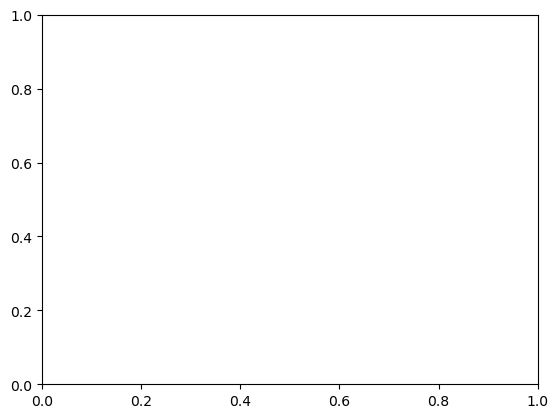

In [23]:
x = plt.xlabel(final_df['salary($)'])
y = plt.ylabel(final_df['0'])
plt.scatter(x,y,color='red',marker='+')

x = plt.xlabel(final_df['salary($)'])
y = plt.ylabel(final_df['eleven'])
plt.scatter(x,y,color='blue',marker='-')

plt.show()

TypeError: float() argument must be a string or a number, not 'Text'

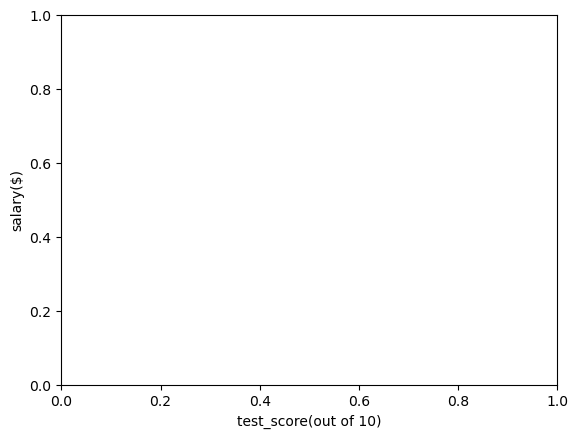

In [27]:
x = plt.xlabel('test_score(out of 10)')
y = plt.ylabel('salary($)')
plt.scatter(x,y,color='red',marker='+')

plt.show()

In [28]:
# 1) Separate feature data from target data 
training_data=final_df.drop('salary($)',axis='columns')
training_data

,test_score(out of 10),interview_score(out of 10),0,eleven,five,seven,ten,three,two
0,8.000000,9,1,0,0,0,0,0,0
1,8.000000,6,1,0,0,0,0,0,0
2,6.000000,7,0,0,1,0,0,0,0
3,10.000000,10,0,0,0,0,0,0,1
4,9.000000,6,0,0,0,1,0,0,0
5,7.000000,10,0,0,0,0,0,1,0
6,7.857143,7,0,0,0,0,1,0,0
7,7.000000,8,0,1,0,0,0,0,0


In [29]:
salary=new_df['salary($)']
salary

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [31]:
regression_model = LinearRegression() 

In [33]:
regression_model.fit(training_data,salary)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


LinearRegression()